In [1]:
import functools
import logging
import pprint

import PIL.Image
import graphcat.notebook
import numpy

import imagecat.notebook

logging.basicConfig(level=logging.DEBUG)

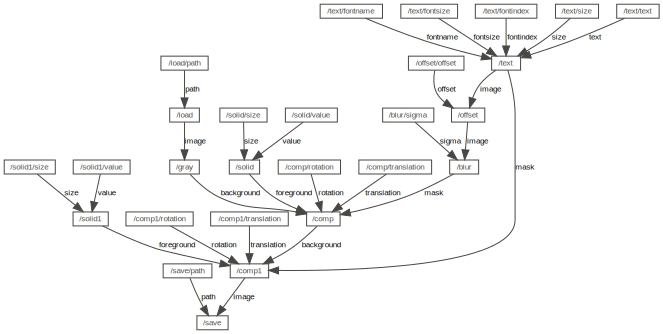

INFO:imagecat:Task /solid1 solid C (500, 200) [1.   0.95 0.15] result C(500x200x3 float16)
INFO:imagecat:Task /solid solid C (500, 200) [0 0 0] result C(500x200x3 float16)
DEBUG:imagecat.io:{'srgb': 1, 'Artist': 'tshead', 'Comment': 'none'}
INFO:imagecat:Task /load load ../artwork/logo.png result C(2560x1440x3 float16) A(2560x1440x1 float16)
INFO:imagecat:Task /text text anchor mm fontindex 4 fontname HelveticaNeue fontsize 96 plane A position (250.0, 100.0) size (500, 200) result A(500x200x1 float16)
INFO:imagecat:Task /offset offset [5 5] * result A(500x200x1 float16)
INFO:imagecat:Task /blur gaussian * 5.0 result A(500x200x1 float16)
INFO:imagecat:Task /comp comp C(500x200x3 float16) over C(2560x1440x3 float16) mask A(500x200x1 float16) rotation 30.0 translation (-0.25, -0.1) result C(2560x1440x3 float16)
INFO:imagecat:Task /comp1 comp C(500x200x3 float16) over C(2560x1440x3 float16) mask A(500x200x1 float16) rotation 30.0 translation (-0.25, -0.1) result C(2560x1440x3 float16)



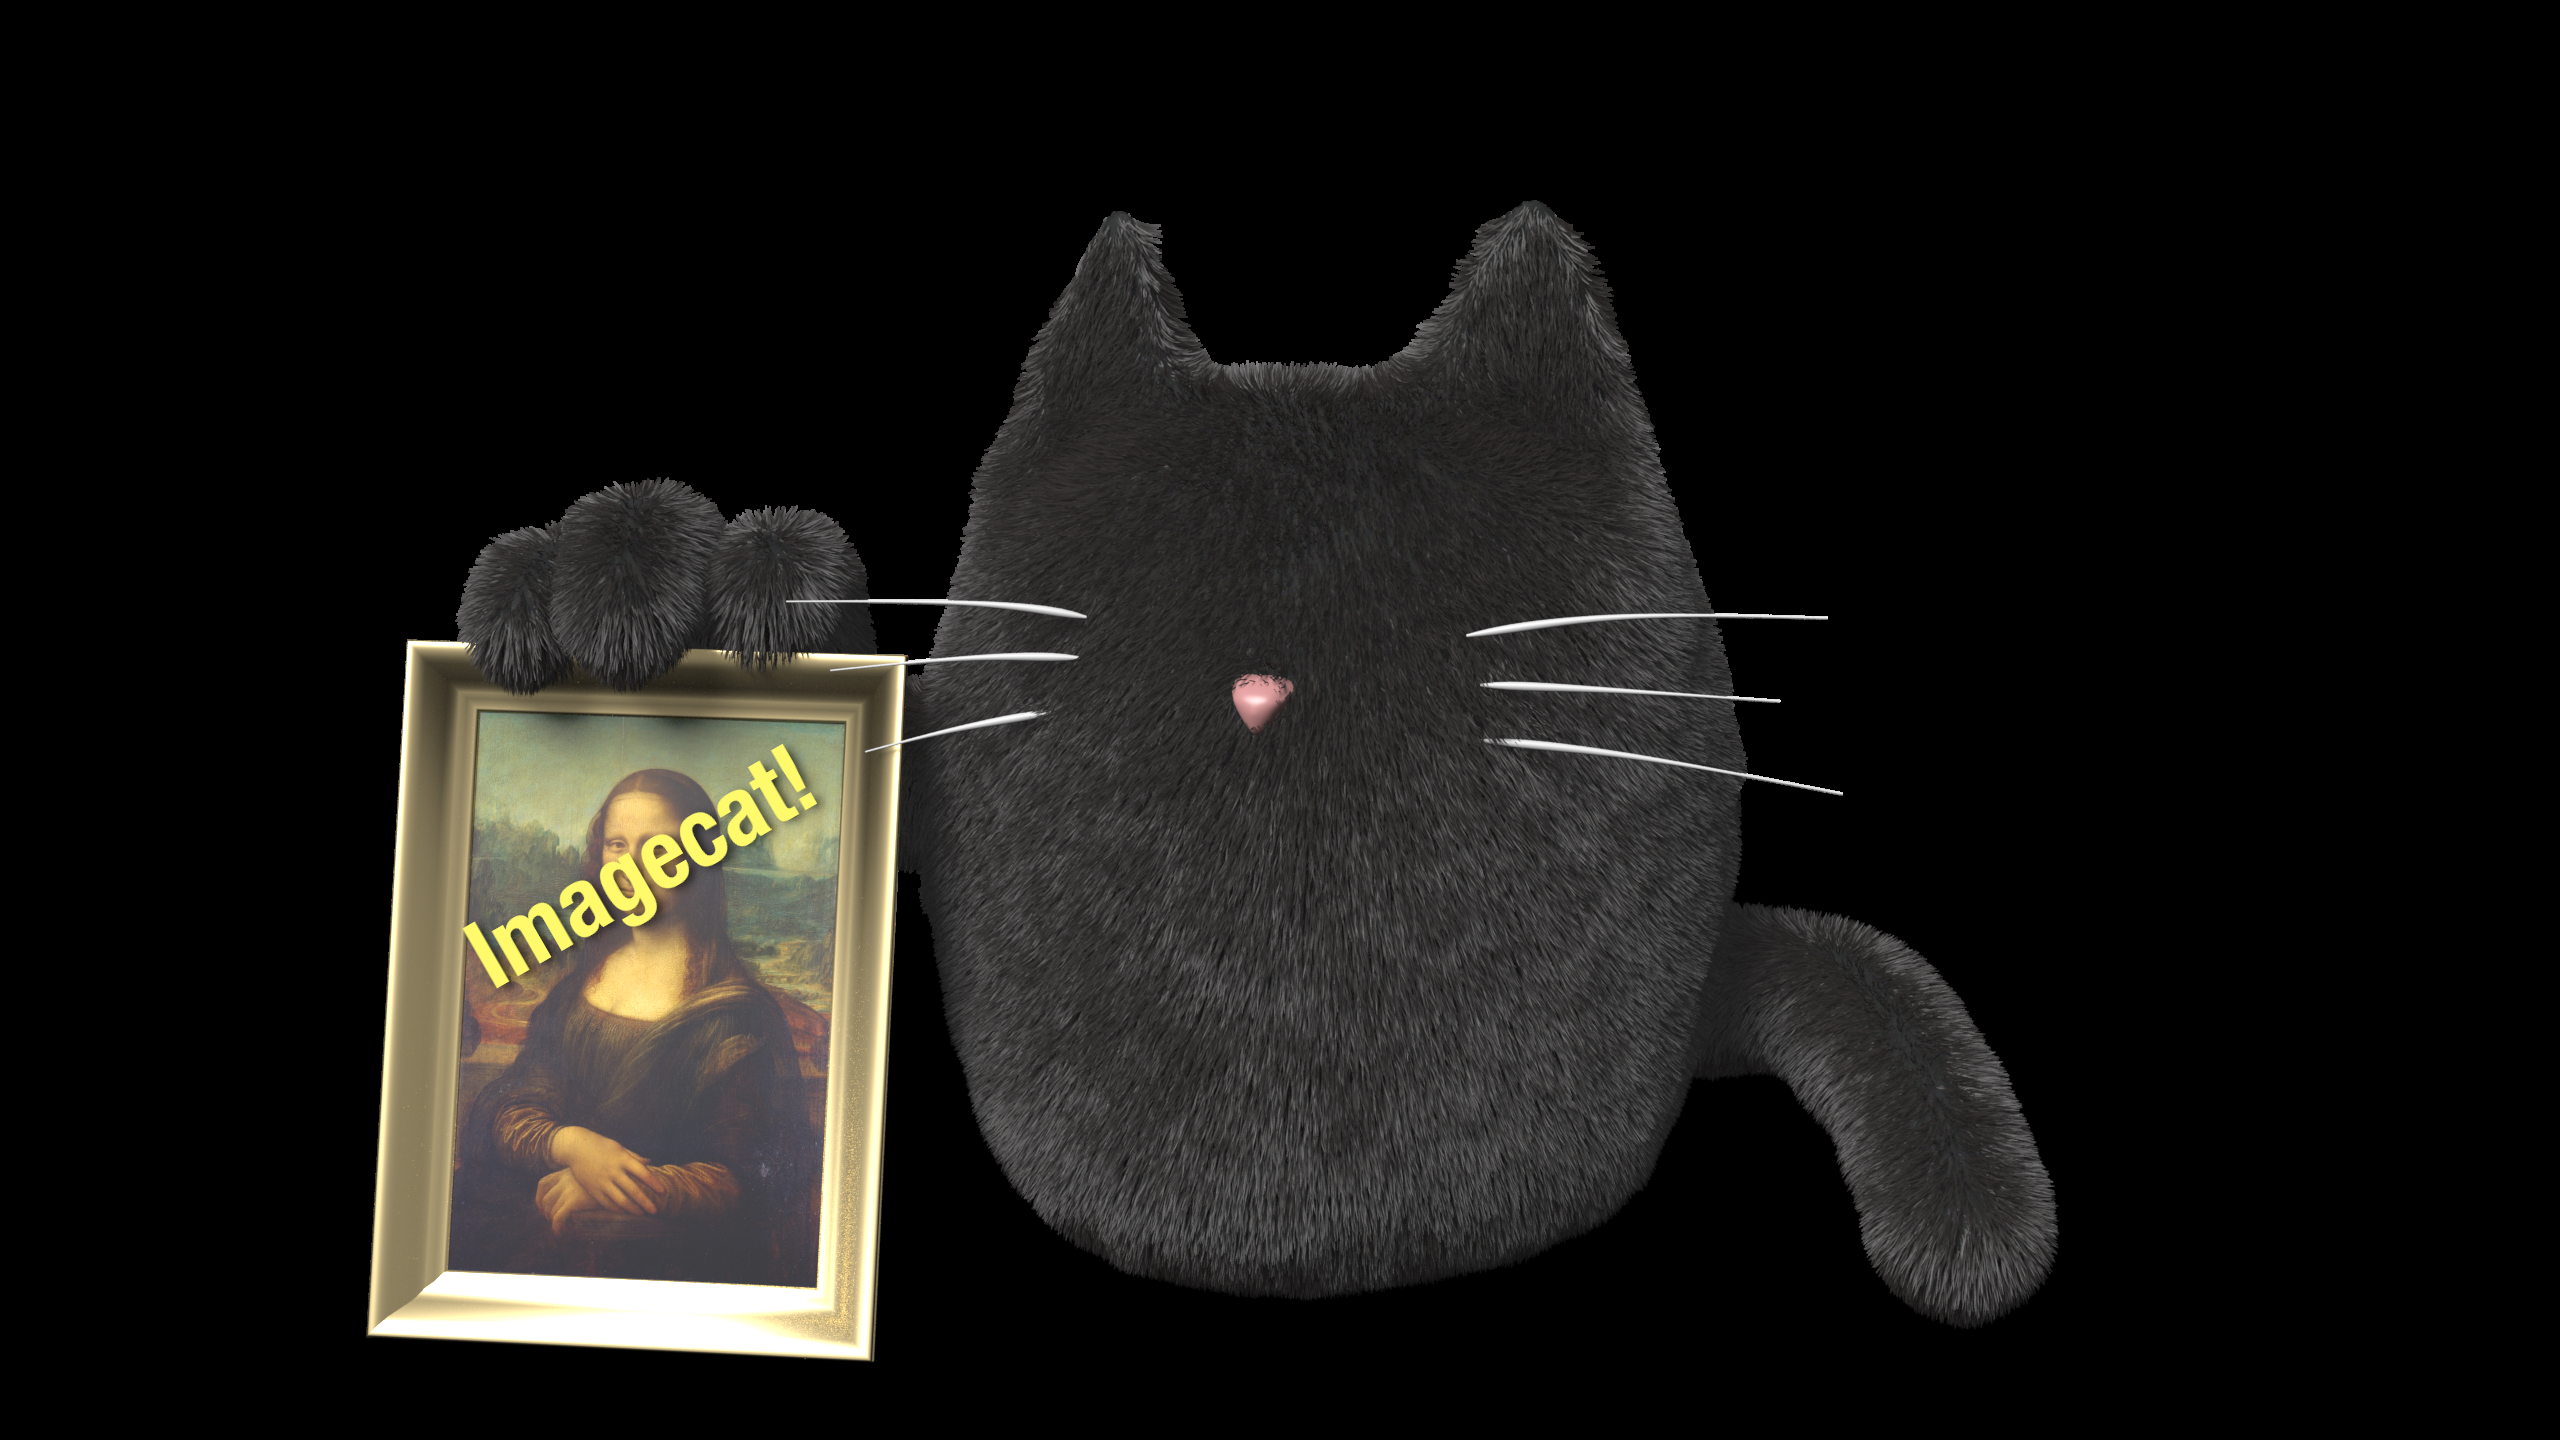

In [2]:
graph = graphcat.Graph()

text = imagecat.add_operation(graph, "/text", imagecat.text, fontname="HelveticaNeue", fontsize=96, fontindex=4, size=(500, 200), text="Imagecat!")
offset = imagecat.add_operation(graph, "/offset", imagecat.offset, offset=(5, 5))
blur = imagecat.add_operation(graph, "/blur", imagecat.gaussian, sigma=5)
graph.add_links(text, (offset, "image"))
graph.add_links(offset, (blur, "image"))

file = imagecat.add_operation(graph, "/load", imagecat.load, path="../artwork/logo.png")
#gray = imagecat.add_operation(graph, "/gray", imagecat.rgb2gray)
gray = imagecat.add_operation(graph, "/gray", graphcat.passthrough("image"))
graph.set_links(file, (gray, "image"))

solid = imagecat.add_operation(graph, "/solid", imagecat.solid, size=(500, 200), value=[0, 0, 0])
comp = imagecat.add_operation(graph, "/comp", imagecat.composite, rotation=30, translation=(-0.25, -0.1))
graph.set_links(solid, (comp, "foreground"))
graph.set_links(gray, (comp, "background"))
graph.set_links(blur, (comp, "mask"))

solid = imagecat.add_operation(graph, "/solid", imagecat.solid, size=(500, 200), value=[1, 0.95, 0.15])
comp2 = imagecat.add_operation(graph, "/comp", imagecat.composite, rotation=30, translation=(-0.25, -0.1))
graph.set_links(solid, (comp2, "foreground"))
graph.set_links(comp, (comp2, "background"))
graph.add_links(text, (comp2, "mask"))

save = imagecat.add_operation(graph, "/save", imagecat.save, path="test.exr")
graph.add_links(comp2, (save, "image"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output(comp2))


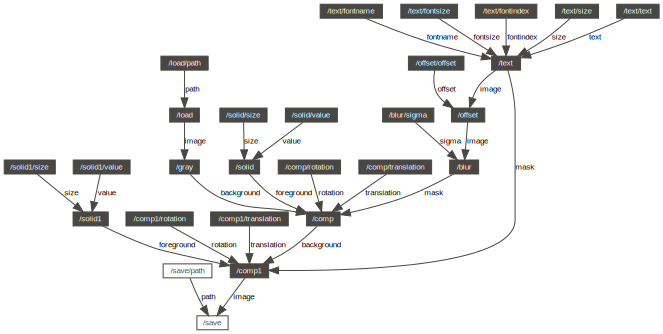

In [3]:
graphcat.notebook.display(graph)

In [7]:
graph.update("/save")

In [8]:
graph.set_task("/save/path", graphcat.constant("test.png"))
graph.update("/save")